<a href="https://colab.research.google.com/github/Manisha-Karim/Bank-Customer-Churn-model-with-Explainable-AI-Lime-/blob/main/Bank_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/datasets/Churn_Modelling.csv")

In [4]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.shape

(10000, 14)

Drop useless features like Rownumber, CustomerId and Surname

In [7]:
df.drop(["RowNumber",	"CustomerId",	"Surname"], axis= 1, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
unique = []
for col in df:
  value = df[col].nunique()
  unique.append([col, value])

unique

[['CreditScore', 460],
 ['Geography', 3],
 ['Gender', 2],
 ['Age', 70],
 ['Tenure', 11],
 ['Balance', 6382],
 ['NumOfProducts', 4],
 ['HasCrCard', 2],
 ['IsActiveMember', 2],
 ['EstimatedSalary', 9999],
 ['Exited', 2]]

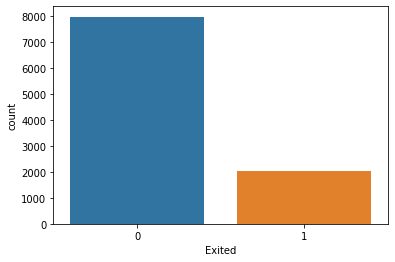

In [10]:
sns.countplot(data = df, x = "Exited" )

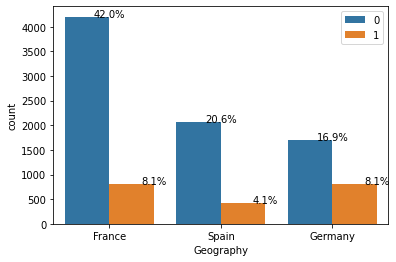

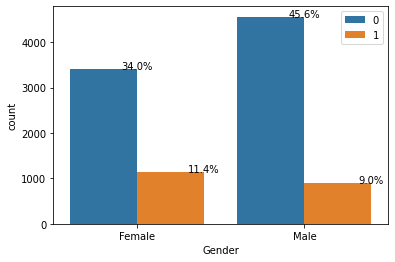

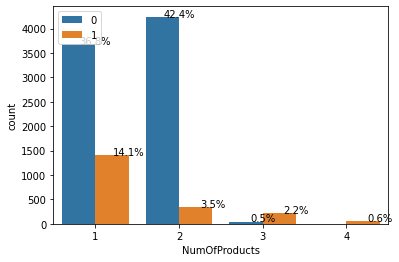

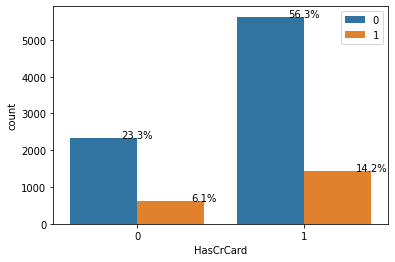

In [11]:
total = len(df)
for col in df[['Geography', 'Gender', 'NumOfProducts','HasCrCard']]:
  ax = sns.countplot(x=col, hue= 'Exited', data = df)
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
  plt.legend()
  plt.show()

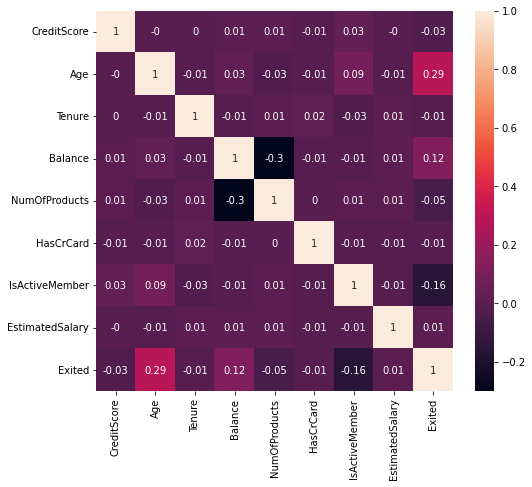

In [12]:
plt.figure(figsize = (8,7))
sns.heatmap(round(df.corr(),2), annot = True)

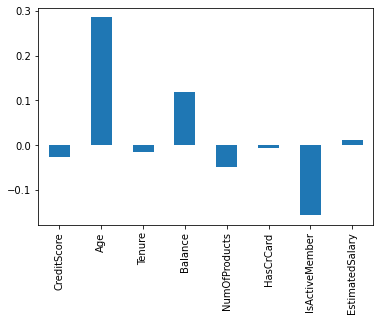

In [13]:
df.corr()['Exited'].drop(['Exited']).plot(kind = 'bar')

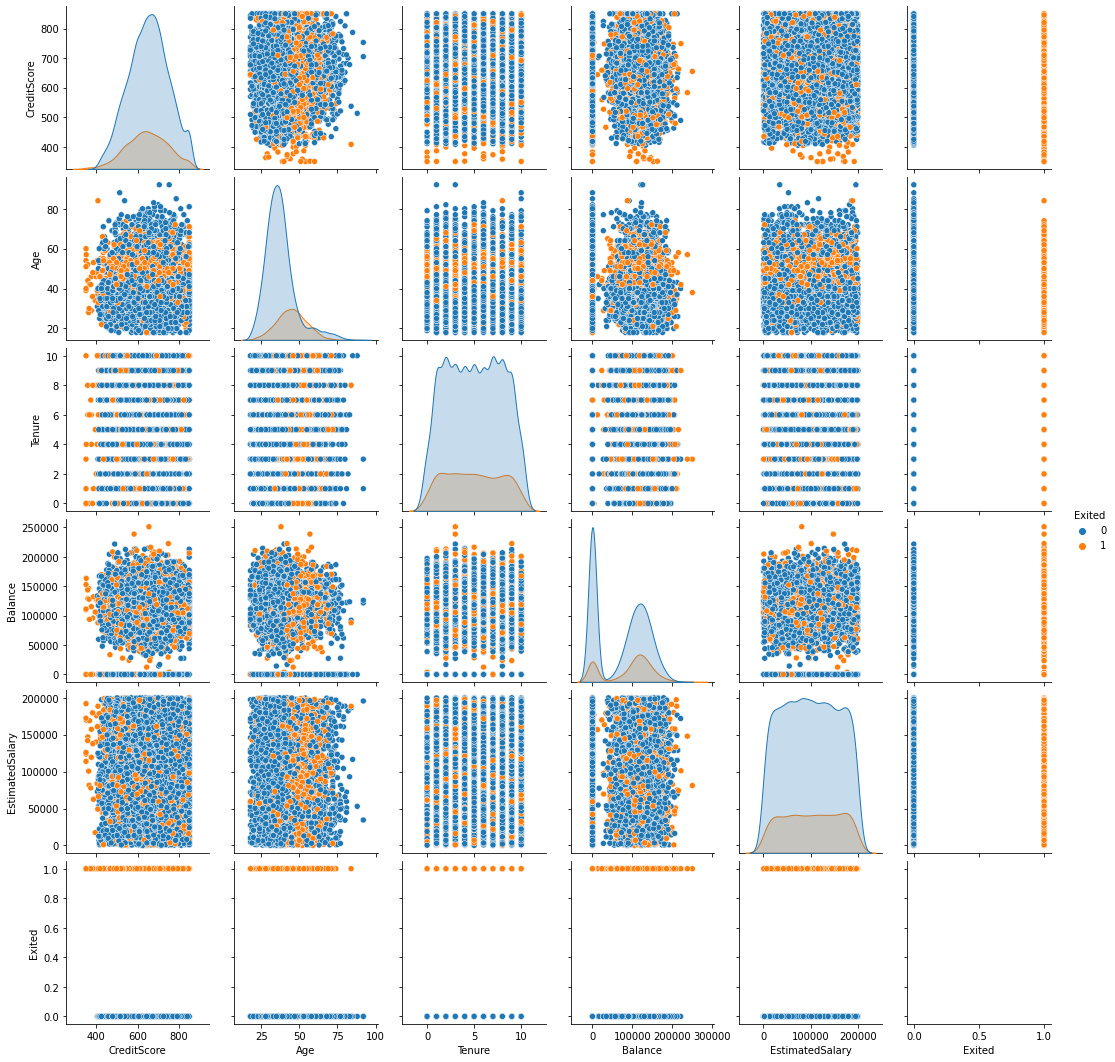

In [14]:
sns.pairplot(data=df, vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited'], hue = 'Exited')

In [15]:
!pip install sweetviz
import sweetviz as sv

my_report = sv.analyze(df, target_feat='Exited')
my_report.show_html()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



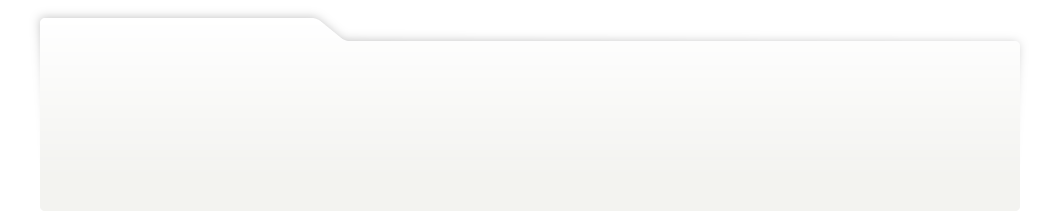
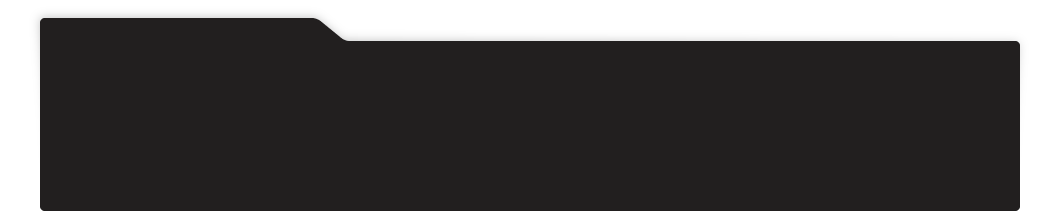
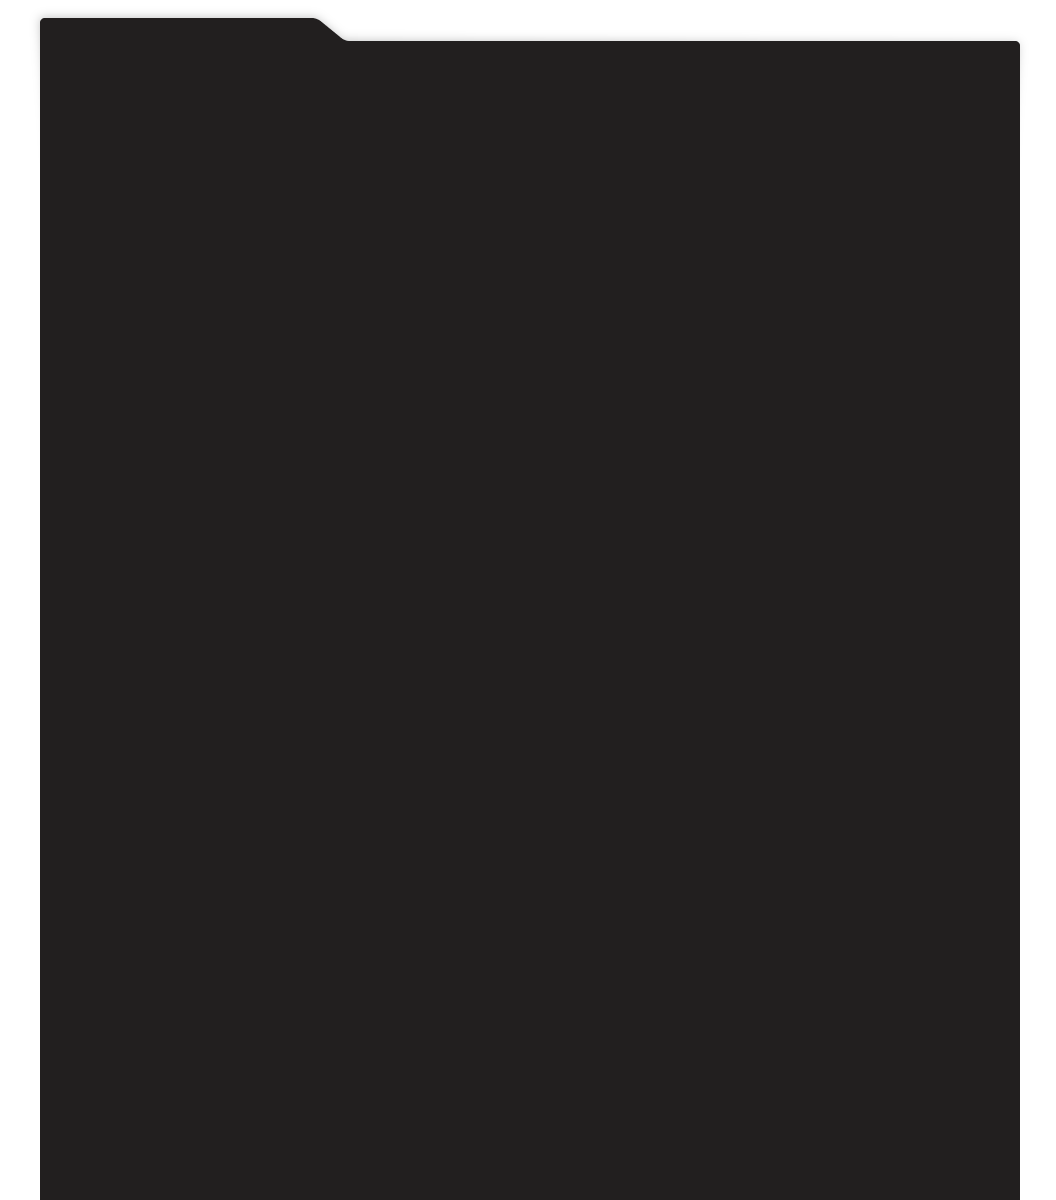
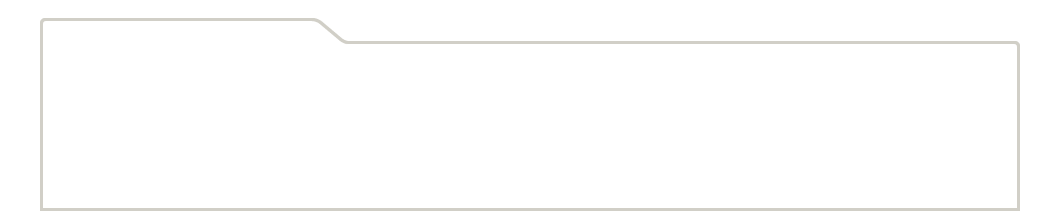
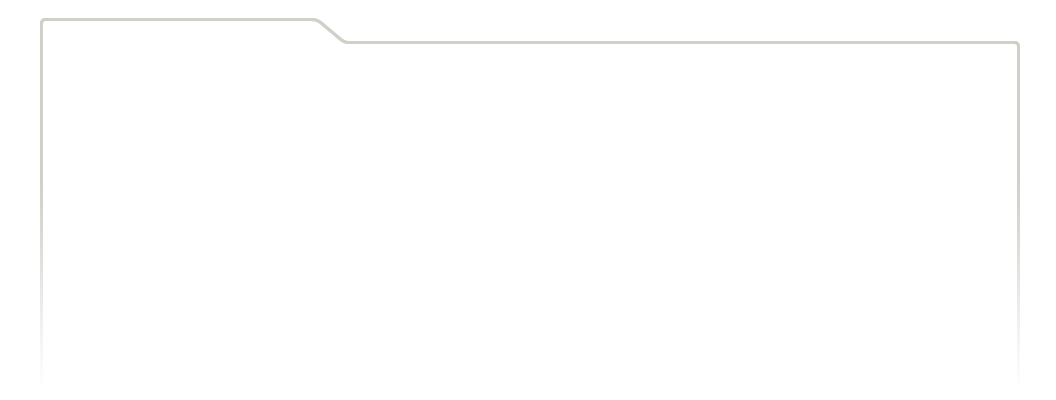
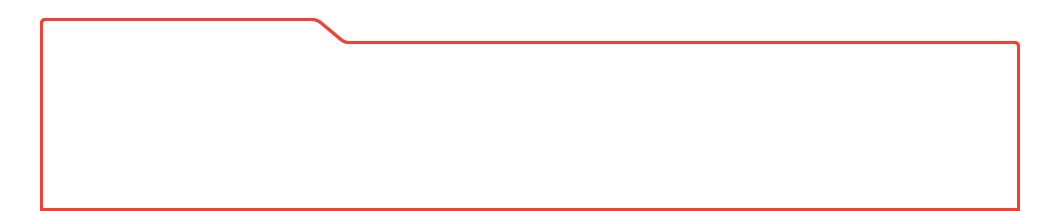
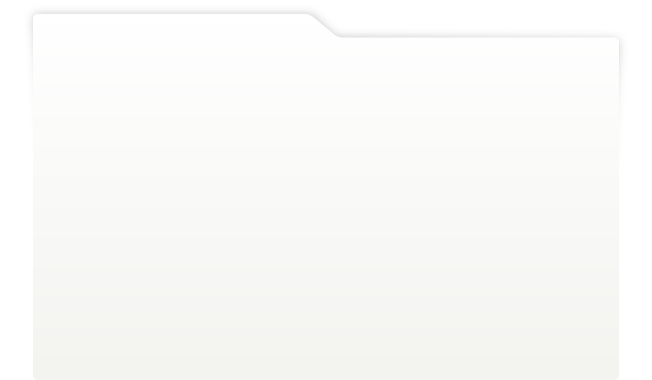
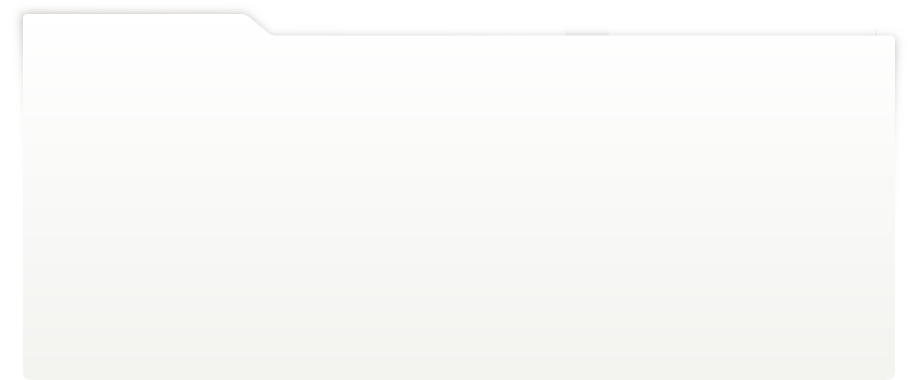
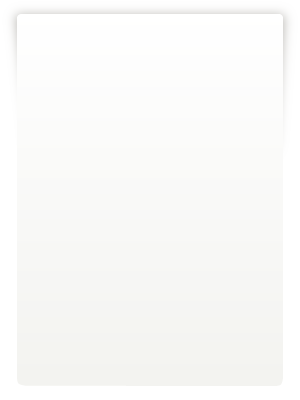
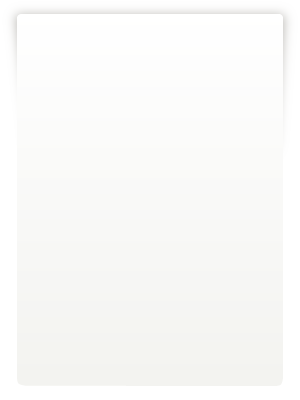
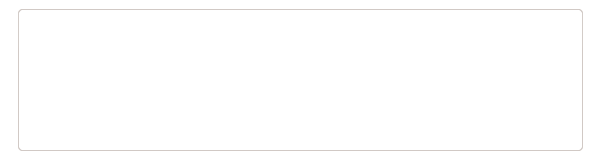
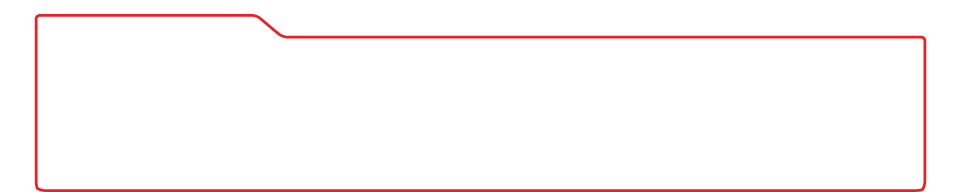
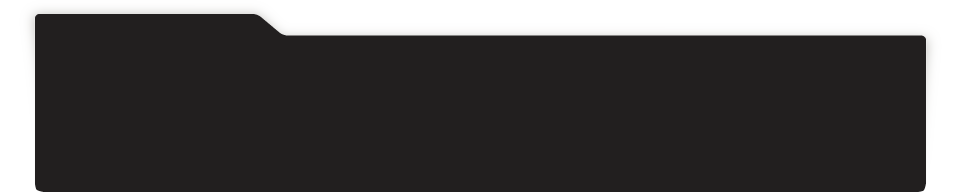
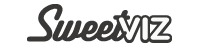
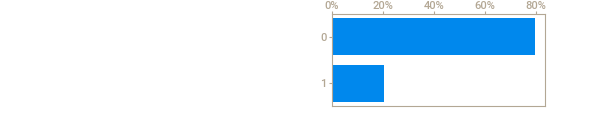
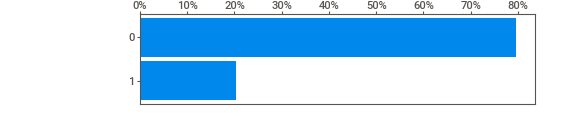
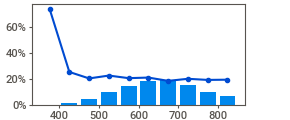
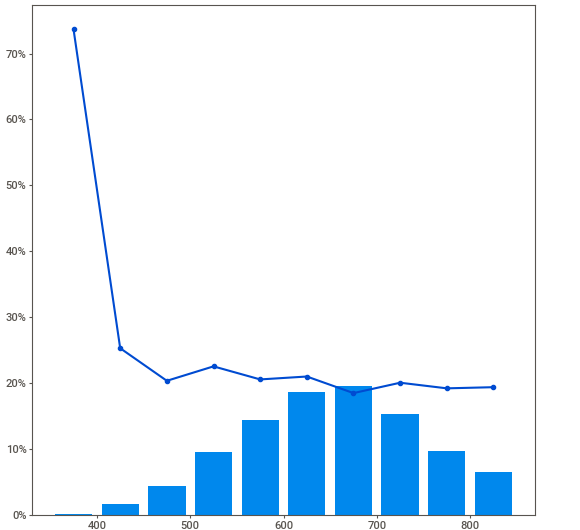
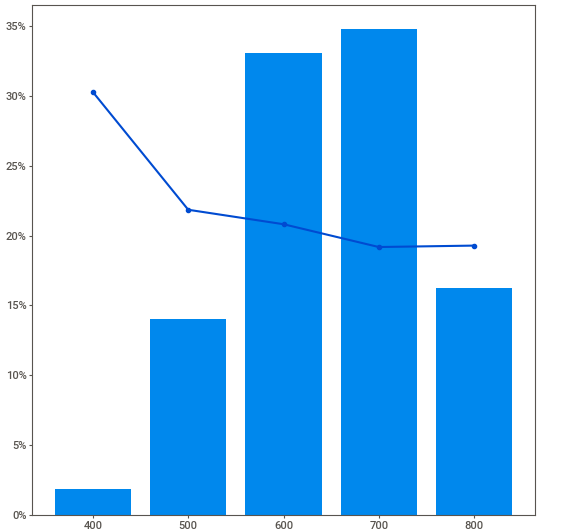
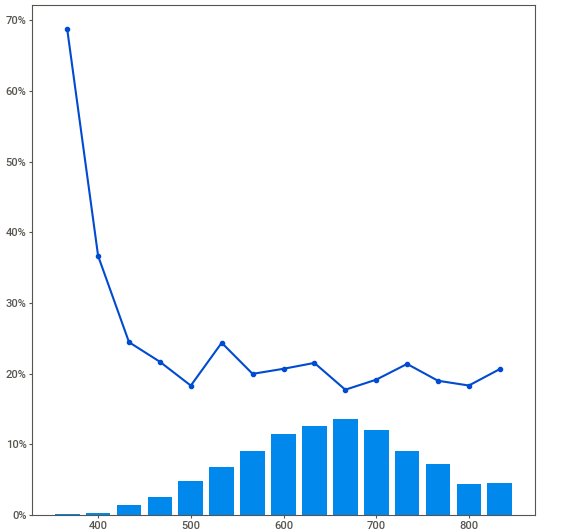
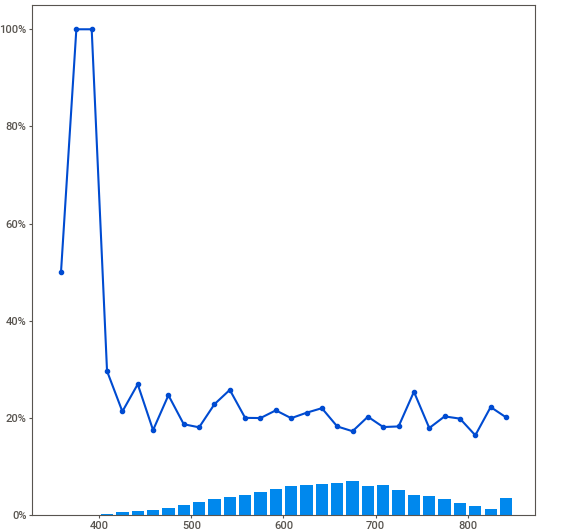
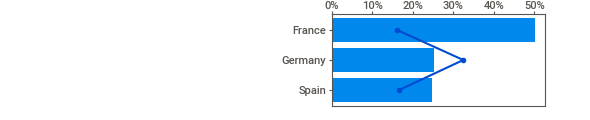
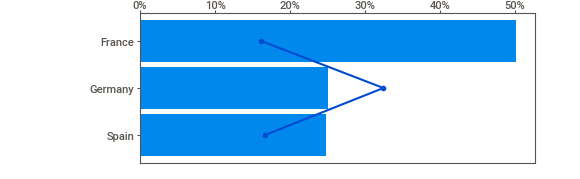
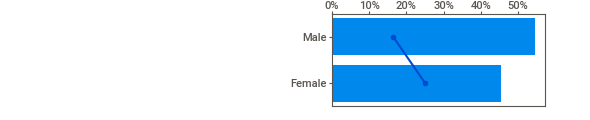
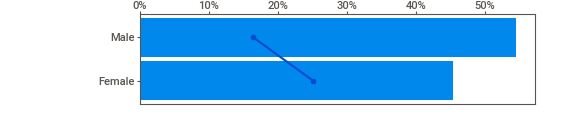
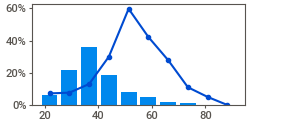
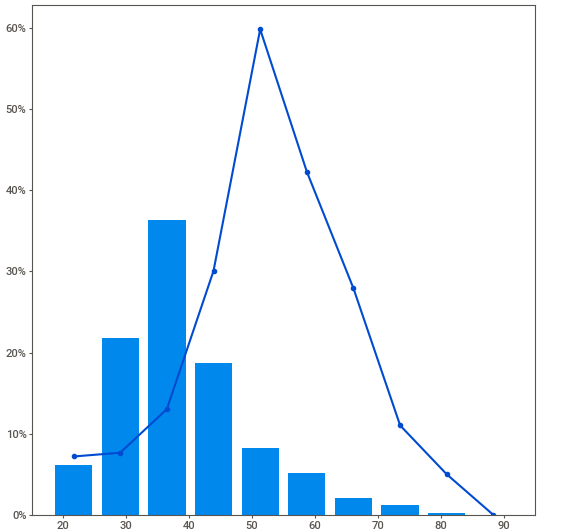
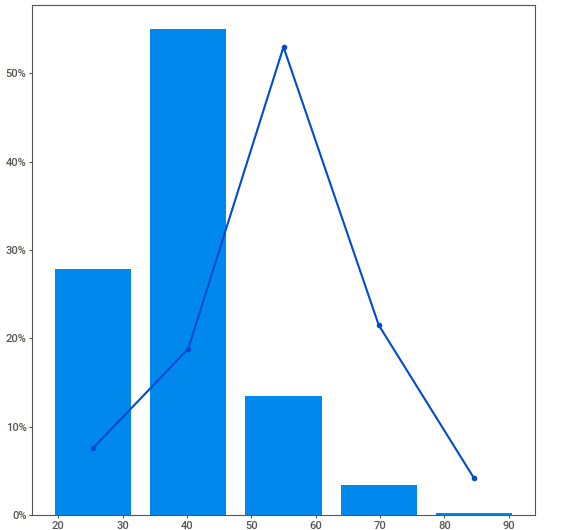
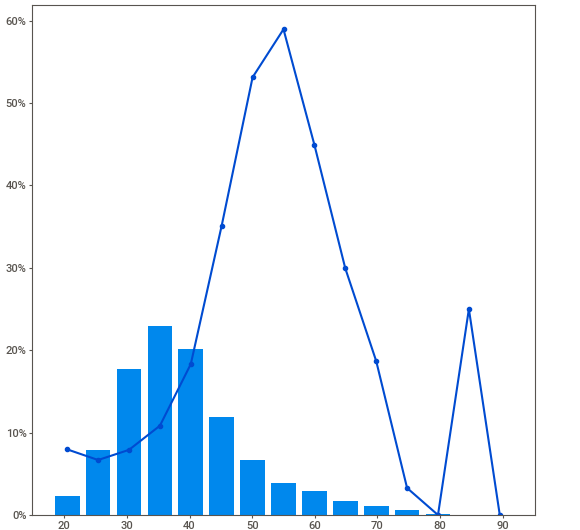
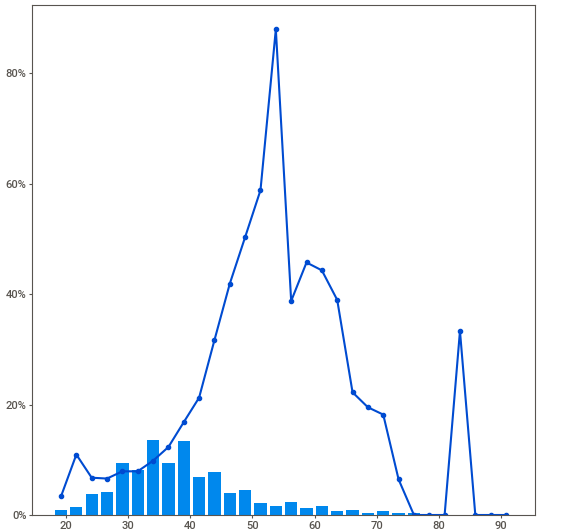
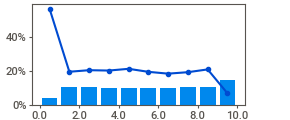
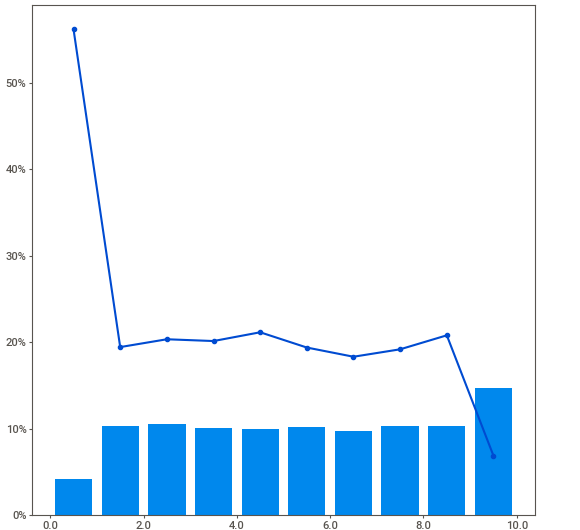
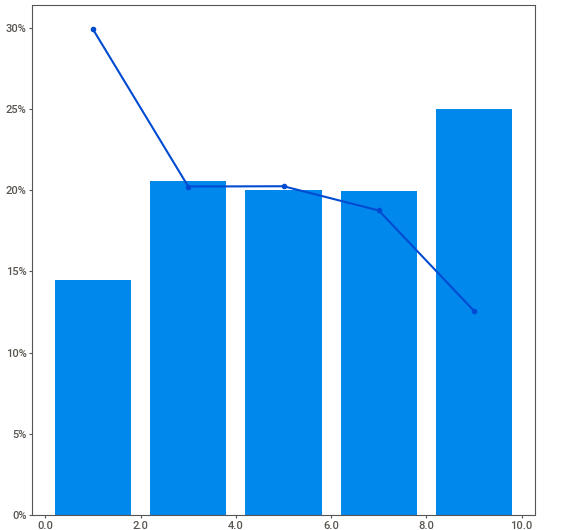
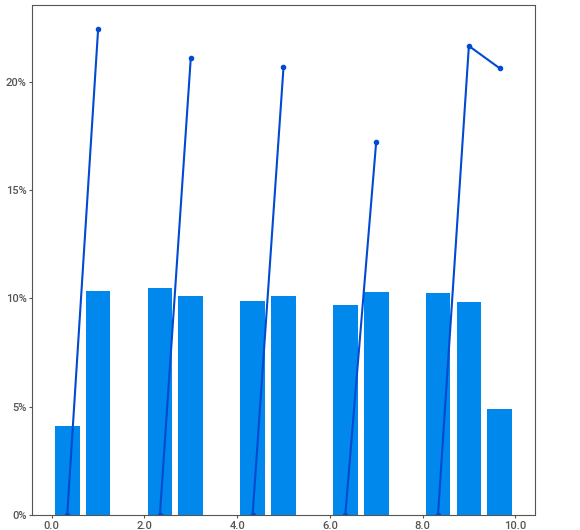
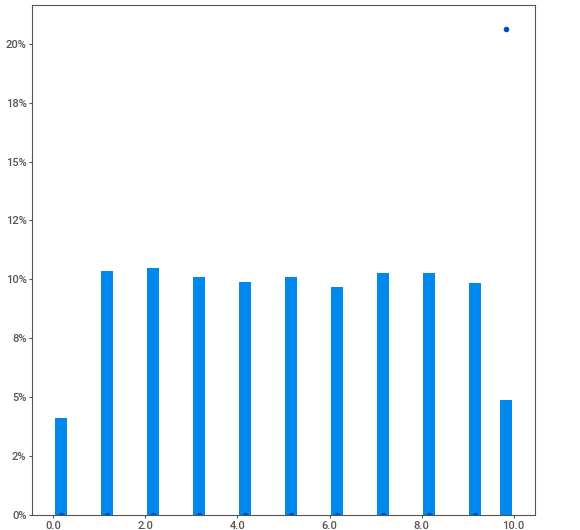
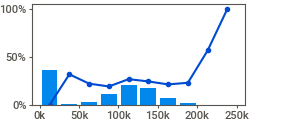
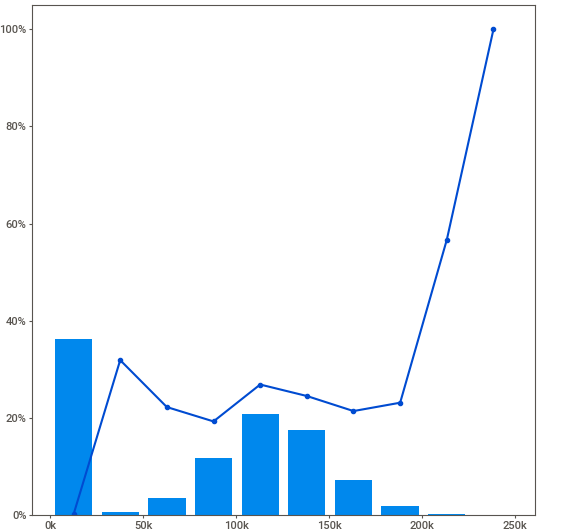
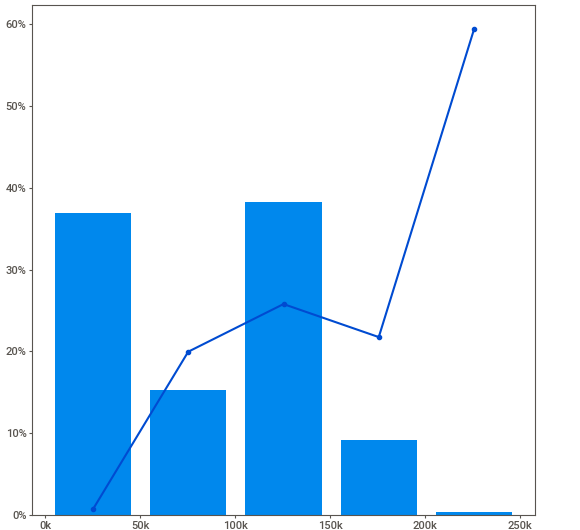
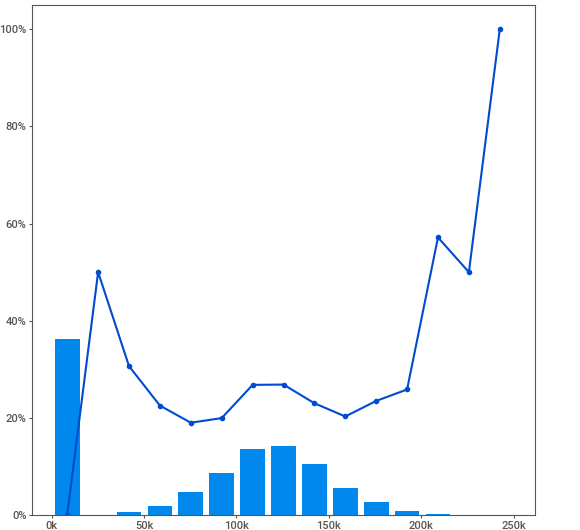
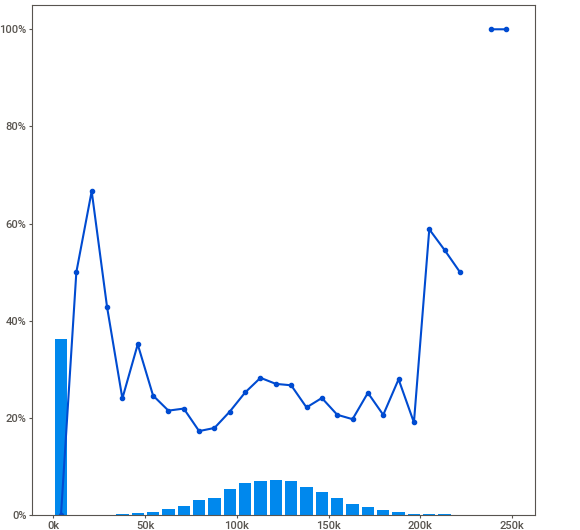
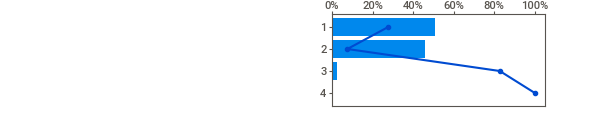
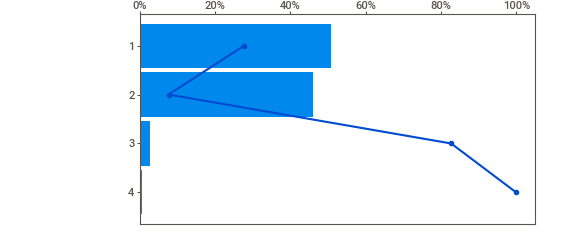
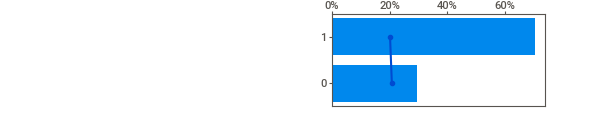
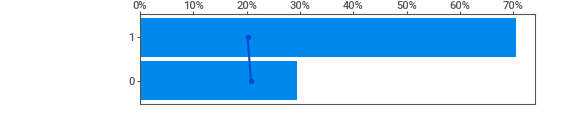
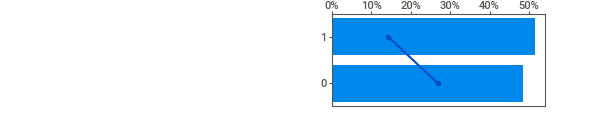
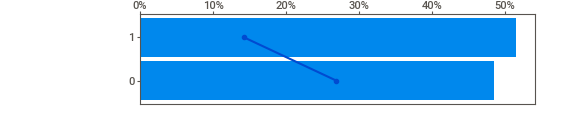
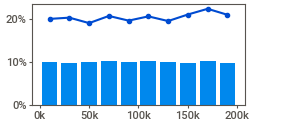
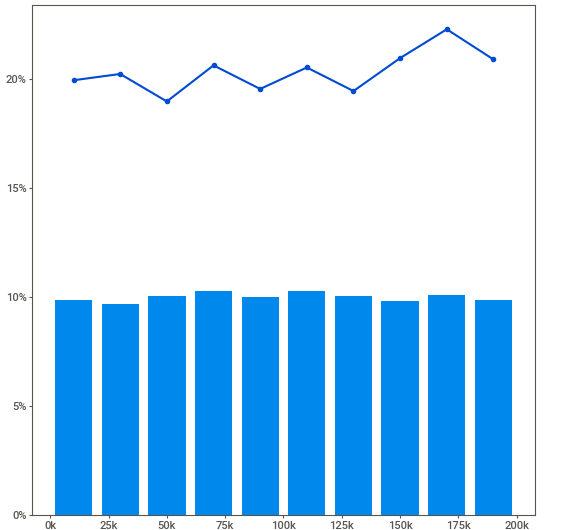
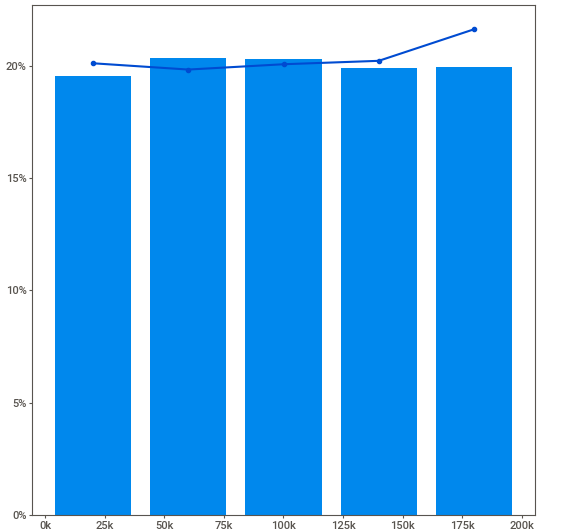
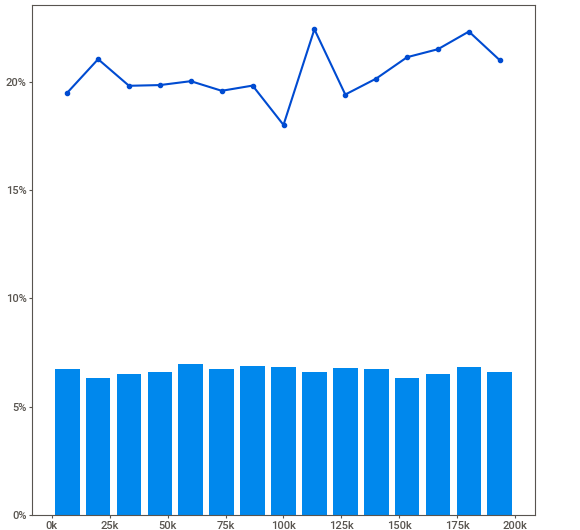
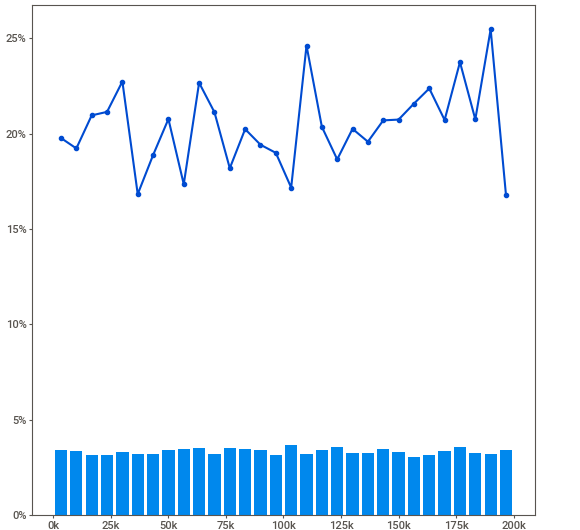
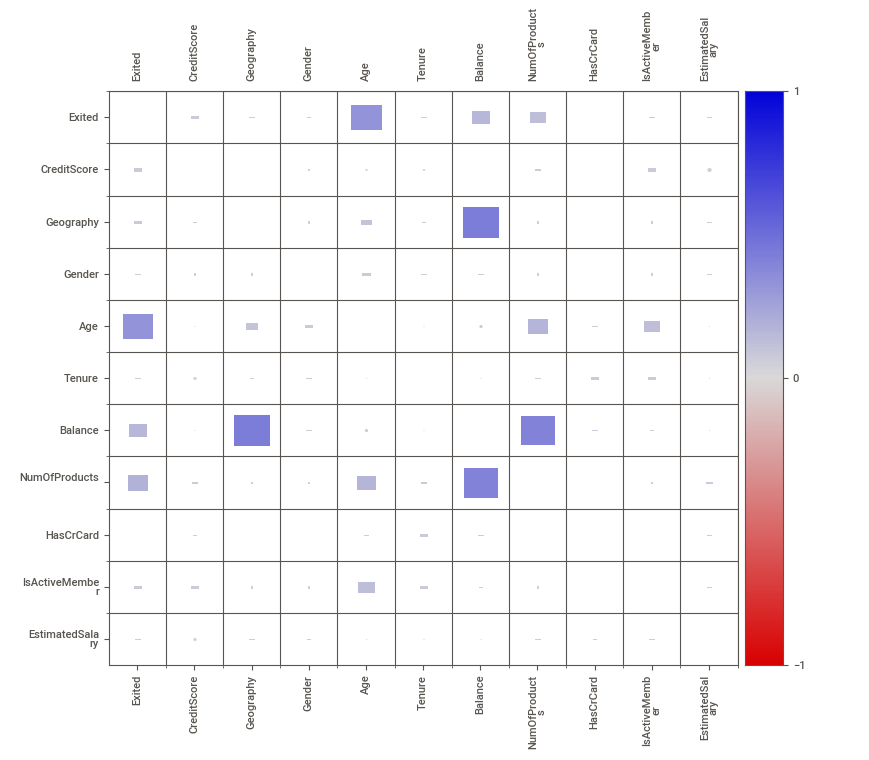
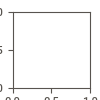

In [16]:
import IPython
IPython.display.HTML('SWEETVIZ_REPORT.html')

1. Data set is extremely imbalanced. 

2. Customers from France are least likely to leave while the probability of customes leaving is most for Germany.

3. Females are most likely to leave the bank.

4. Customers using 3 or more products are most likely to leave. All customes using all 4 products left.

5. The customers with credit card are less likely to leave.

6. The exit of a customer is related with Age,Balance and if the customer is an active member.

7. There seems to be an overlap between all points so linear prediction methods are to be avoided.

In [17]:
df = pd.get_dummies(df, drop_first= True)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df.drop(['Exited'], axis = 1)
y=df['Exited']

In [20]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size= 0.30)

Balance Dataset using SMOTETomek

In [21]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_train,y_train=smk.fit_resample(X_train,y_train)
X_train.shape,y_train.shape

((9532, 11), (9532,))

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score,plot_confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score,classification_report

In [23]:
RF_Parameters = {
               'n_estimators' : range( 26, 50, 5),               
               'max_samples' : range(344, 510, 20),
               'max_depth' : [4, 5, 6, 7]
                }


RF_gridsearchcv = GridSearchCV(RandomForestClassifier(n_jobs = -1), RF_Parameters)
RF_gridsearchcv.fit(X_train, y_train)

RF_model = RF_gridsearchcv.best_estimator_
RF_ypred = RF_model.predict(X_test)

In [24]:
print(classification_report(y_test, RF_ypred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      2416
           1       0.49      0.62      0.55       584

    accuracy                           0.80      3000
   macro avg       0.70      0.73      0.71      3000
weighted avg       0.82      0.80      0.81      3000



In [25]:
#Install non-standard packages (assuming jupyter notebook)
!pip install shap
!pip install lime
!pip install eli5



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


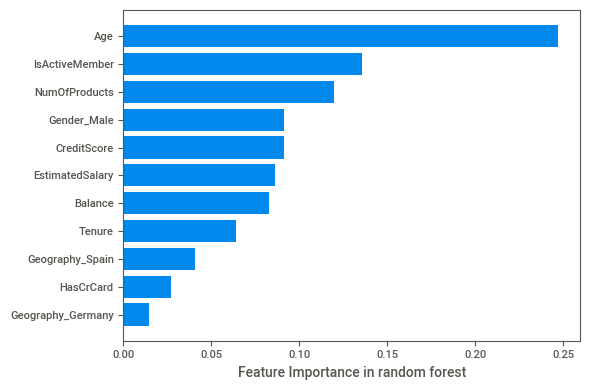

In [26]:
# Feature importance dataframe
imp_df = pd.DataFrame({'feature': X_train.columns.values,
                       'importance': RF_model.feature_importances_})
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='importance')
imp_range=range(1,len(imp_df.index)+1)
 
## Barplot with confidence intervals
height = ordered_df['importance']
bars = ordered_df['feature']
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Feature Importance in random forest")

plt.tight_layout()
# Show graphic
plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Intercept 0.26719230149926465
Prediction_local [0.43987194]
Right: 0.29729041283919333


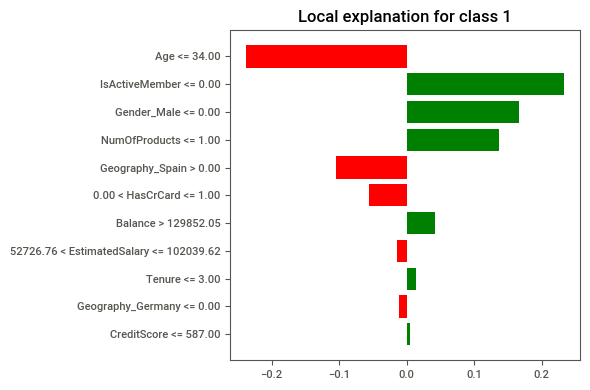

In [31]:
#Explain samples in test set
import lime
import lime.lime_tabular

X_explain = X_test
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                                   feature_names=X_train.columns.values,
                                                   discretize_continuous=True,
                                                   mode="classification",
                                                   verbose=True,
                                                   random_state= 42)

#Explaining first subject in test set using all 30 features
exp = explainer.explain_instance(X_explain.values[6,:],RF_model.predict_proba, 
                                 num_features=12)
#Plot local explanation
plt = exp.as_pyplot_figure()
plt.tight_layout()
exp.show_in_notebook(show_table=True)